In [1]:
#exercice 1

In [2]:
def DFS(g):
    global da
    arbre_dfs = []
    couleur = []
    parent = [] 
    date = []
    da = 0
    for v in g.vertices():
        couleur.insert(v, "blanc") 
        date.insert(v, [0, 0])
        parent.insert(v, -1)
    for v in g.vertices():
        if couleur[v] == "blanc":
            visiter(g, v, couleur, parent, date, arbre_dfs)
    return parent, date, arbre_dfs

def visiter(g, u, couleur, parent, date, arbre_dfs):
    global da
    couleur[u] = "gris"
    da += 1
    date[u][0] = da
    if g.is_directed():
        voisins = g.neighbors_out(u)
    else:
        voisins = g.neighbors(u) 
    for w in  voisins:
            if couleur[w] == "blanc":
                parent[w] = u 
                arbre_dfs.append((u, w))
                visiter(g, w, couleur, parent, date, arbre_dfs)
    couleur[u] = "noir"
    da += 1
    date[u][1] = da

In [3]:
def decomposition_chaine(g):
    parent, date, arbre_dfs = DFS(g)
    n = g.order()
    m = g.size()
    orienter = g.is_directed()
    edges = g.edges(labels=False)
    chaines = []
    aretes_retour = []
    connexe = False

    print("Graphe orienter ?", orienter)

    if len(arbre_dfs) != n - 1:
        return chaines, aretes_retour, connexe #pas connexe car le parcours en profondeur n'a pas atteind certain sommet
    connexe = True
    visiter = [False] * n
    if orienter:
        aretes_retour = [arete for arete in edges if arete not in arbre_dfs and date[u][0] < date[v][0]]
    else:
        aretes_retour = [arete for arete in edges if arete not in arbre_dfs]
    dfi = sorted(range(n), key=lambda element: date[element][0])
    print("arbres dfs", arbre_dfs)
    print("aretes retour", aretes_retour)
    print("dfi", dfi)  
    for u, v in aretes_retour:
        chaine = []
        cycle = True
        chaine.append(u)
        chaine.append(v)
        for w in dfi:
            if (v, w) in aretes_retour or u == w:
                continue
            if (v, w) in edges and not visiter[w]:
                chaine.append(w)
                visiter[w] = True
                v = w
                break
        if chaine:
            if (w, u) in edges:
                for ch in chaines:
                    if u in ch:
                        cycle = False
                if cycle:
                    chaine.append(u)
            chaines.append(chaine)

                        
    return chaines, aretes_retour, connexe

In [4]:
def est_deux_connexe_arete_sommet(g):
    def est_cycle(chaine):
        return len(chaine) > 2 and chaine[0] == chaine[-1]
        
    connexiter = {"connexe": False, "arete_connexe": False, "sommet_connexe": False}
    #orienter = g.is_direted()
    edges = g.edges(labels=False)
    
    if len(edges) < 3:
        return connexiter
    
    chaines, aretes_retour, connexe = decomposition_chaine(g)
    print("decomposition en chaines", chaines)
    
    if connexe == False:
        print("Le graphe n'est pas connexe")
        return connexiter
    
    connexiter["connexe"] = True    
    ############################## verificqtion 2 arete connexe ##################################
    aretes_chaines = set()

    for chaine in chaines:
        for i in range(len(chaine) - 1):
            arete = tuple(sorted((chaine[i], chaine[i + 1])))
            if arete in aretes_chaines:
                connexiter["arete_connexe"] = False
                break
            aretes_chaines.add(arete)
    else:  # Exécuté si la boucle n'est pas interrompue
        connexiter["arete_connexe"] = aretes_chaines == set(map(tuple, map(sorted, edges)))
    ############################## verificqtion 2 sommet connexe ##################################
    
    test_autres_cycle = False
    for chaine in chaines[1:]:
        if est_cycle(chaine):
            test_autres_cycle = True
    
    if min(g.degree()) < 2 or not est_cycle(chaines[0]) or test_autres_cycle:
        return connexiter
    
    connexiter["sommet_connexe"] = True
    return connexiter

def rendu(connexiter):
    if connexiter.get("arete_connexe") and connexiter.get("sommet_connexe"):
        print("Le graphe est deux arete connexe et deux sommet connexe")
    elif connexiter.get("sommet_connexe"):
        print("Le graphe est deux sommet connexe, mais pas deux arete connexe")
    else:
        print("Le graphe n'est pas deux arete connexe ni deux sommet connexe")


In [5]:
#exercice 2

In [6]:
def orientation_fortement_connexe(g):
    connexe = est_deux_connexe_arete_sommet(g)
    if not connexe.get("arete_connexe"):
        print("Le graphe n'a pas d'orientation fortement connexe")
        return False
    ###################################### a partir d'ici le code est faux mais nous ne trouvon pas l'algo pour passer de graphe simple a une orientation fortement connexe
    print("a partir d'ici le code est faux mais nous ne trouvon pas l'algo pour passer de graphe simple a une orientation fortement connexe")
    edges = g.edges(labels=False)
    h = DiGraph()
    h.add_vertices(g.vertices())
    parent, date, arbre_dfs = DFS(g)
    for i in range(len(parent)-1):
        v = parent[i+1]
        h.add_edges([(i+1, v)])
        
    for u, v in edges:
        if date[u] < date[v]:
            h.add_edges([(u, v)])
        else:
            h.add_edges([(v, u)])
    return h

In [7]:
# EXEMPLES POUR DIFFERENTES SITUATIONS

In [8]:
g = Graph()

In [9]:
# EXEMPLE 1: Un graphe avec moins de 3 arêtes
#g.add_edges([[0,1],[1,2]])

In [10]:
# EXEMPLE 2: Un graphe non connexe
#g.add_edges([[0,1], [2,3], [3, 4]])

In [11]:
# EXEMPLE 3: Un graphe connexe mais pas deux connexe ni deux arete connexe
#g.add_edges([[0,1],[1,3],[3,2],[2,0],[3,4],[4,5],[5,6],[6,4]])

In [12]:
# EXEMPLE 4: Un graphe, qui est deux sommet connexe mais qui n'est pas deux arete connexe
#g.add_edges([[0,1],[1,2],[1,3],[2,0],[0,3],[3,4],[4,5],[5,0]]) 

In [13]:
# EXEMPLE 5: Un graphe, qui est deux arete connexe et deux sommet connexe
g.add_edges([[0,1],[1,2],[2,3],[0,3],[0,2],[1,3]]) 

Graphe orienter ? False
arbres dfs [(0, 1), (1, 2), (2, 3)]
aretes retour [(0, 2), (0, 3), (1, 3)]
dfi [0, 1, 2, 3]
decomposition en chaines [[0, 2, 1, 0], [0, 3, 2], [1, 3, 0]]
{'connexe': True, 'arete_connexe': True, 'sommet_connexe': True}
Le graphe est deux arete connexe et deux sommet connexe


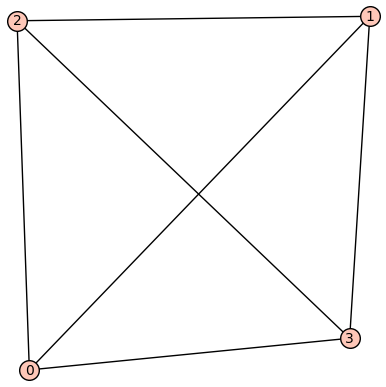

In [14]:
co = est_deux_connexe_arete_sommet(g)
print(co)
rendu(co)
g.show()

Graphe orienter ? False
arbres dfs [(0, 1), (1, 2), (2, 3)]
aretes retour [(0, 2), (0, 3), (1, 3)]
dfi [0, 1, 2, 3]
decomposition en chaines [[0, 2, 1, 0], [0, 3, 2], [1, 3, 0]]
a partir d'ici le code est faux mais nous ne trouvon pas l'algo pour passer de graphe simple a une orientation fortement connexe


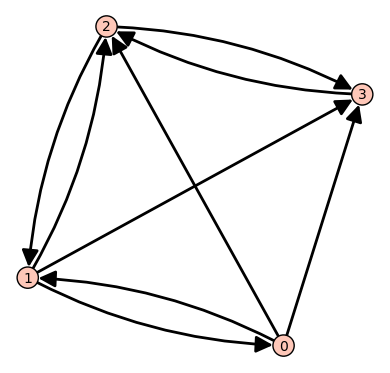

In [15]:
h = orientation_fortement_connexe(g)
h.show()